## Input Data

In [82]:
import atlite
import xarray as xr
import pandas as pd
import geopandas as gpd

The ***europe-2013-era5.nc*** NetCDF4 file contains the Era5 data consisting of <code>height</code>, <code>wnd100m</code>, <code>roughness</code>, <code>influx_toa</code>, <code>influx_direct</code>, <code>influx_diffuse</code>, <code>albedo</code>, <code>temperature</code>, <code>soiltemperature</code> and <code>runoff</code>. The data is spatially distributed by 0.3° longitude and latitude and hourly time resolution.

In [83]:
f = "data/europe-2013-era5.nc"
era_data = xr.open_dataset(filename_or_obj=f, engine="netcdf4")
era_data

<xarray.Dataset>
Dimensions:           (x: 157, y: 131, time: 8760)
Coordinates:
  * x                 (x) float64 -12.0 -11.7 -11.4 -11.1 ... 34.2 34.5 34.8
  * y                 (y) float64 33.0 33.3 33.6 33.9 ... 71.1 71.4 71.7 72.0
  * time              (time) datetime64[ns] 2013-01-01 ... 2013-12-31T23:00:00
    lon               (x) float64 ...
    lat               (y) float64 ...
Data variables:
    height            (y, x) float32 ...
    wnd100m           (time, y, x) float32 ...
    roughness         (time, y, x) float32 ...
    influx_toa        (time, y, x) float32 ...
    influx_direct     (time, y, x) float32 ...
    influx_diffuse    (time, y, x) float32 ...
    albedo            (time, y, x) float32 ...
    temperature       (time, y, x) float32 ...
    soil temperature  (time, y, x) float32 ...
    runoff            (time, y, x) float32 ...
Attributes:
    module:             era5
    prepared_features:  ['runoff', 'height', 'wind', 'influx', 'temperature']
    chunksize_time:     100
    dx:                 0.3
    dy:                 0.3

In [84]:
era_cutout = atlite.Cutout("data/europe-2013-era5.nc")
era_cutout

<Cutout "europe-2013-era5">
 x = -12.00 ⟷ 34.80, dx = 0.30
 y = 33.00 ⟷ 72.00, dy = 0.30
 time = 2013-01-01 ⟷ 2013-12-31, dt = H
 module = era5
 prepared_features = ['height', 'wind', 'influx', 'temperature', 'runoff']

The ***regions_onshore_elec_s_37.geojson*** and ***regions_offshore_elec_s_37.geojson*** file describes the shape of the different clusters/voronoi cells. Here there are only 37 cells which corresponds to the country borders.

In [85]:
gdf_onshore = gpd.read_file("data/regions_onshore_elec_s_37.geojson")
gdf_onshore

,name,geometry
0,AL0 0,"POLYGON ((20.32207 39.91318, 20.39703 39.81809..."
1,AT0 0,"POLYGON ((14.94402 46.83544, 15.00447 46.63686..."
2,BA0 0,"POLYGON ((17.62996 45.15735, 17.68474 45.16396..."
3,BE0 0,"POLYGON ((5.71028 49.53109, 5.67555 49.53781, ..."
4,BG0 0,"POLYGON ((24.00074 41.46414, 23.94989 41.43758..."
5,CH0 0,"POLYGON ((6.85093 46.04965, 6.84855 46.08504, ..."
6,CZ0 0,"POLYGON ((16.91052 48.63078, 16.89667 48.69698..."
7,DE0 0,"MULTIPOLYGON (((8.45827 47.63988, 8.51493 47.6..."
8,DK0 0,"MULTIPOLYGON (((9.61036 54.90323, 9.62993 54.9..."
9,DK4 0,"POLYGON ((11.71762 55.92084, 11.66310 55.90717..."


In [86]:
gdf_onshore.explore(legend=True)

In [87]:
gdf_offshore = gpd.read_file("data/regions_offshore_elec_s_37.geojson")
gdf_offshore

,name,geometry
0,AL0 0,"POLYGON ((19.98542 39.69475, 20.01003 39.69120..."
1,BE0 0,"POLYGON ((3.25367 51.34858, 3.10403 51.31485, ..."
2,BG0 0,"POLYGON ((29.34583 42.24111, 28.32389 41.99778..."
3,DE0 0,"MULTIPOLYGON (((14.22389 53.70083, 13.95916 53..."
4,DK0 0,"POLYGON ((9.99277 55.70499, 10.04583 55.75027,..."
5,DK4 0,"MULTIPOLYGON (((12.93400 54.83381, 12.74997 54..."
6,EE6 0,"POLYGON ((23.72555 58.74471, 23.53527 58.74180..."
7,ES0 0,"MULTIPOLYGON (((-5.36028 35.91625, -5.39555 35..."
8,ES2 0,"POLYGON ((1.87083 37.64028, 1.73314 37.62605, ..."
9,FI4 0,"MULTIPOLYGON (((23.43159 59.95382, 23.56135 59..."


In [88]:
gdf_offshore.explore(legend=True)

The ***The capfacs_37.csv*** file describes the capacity factors for every country (37 nodes) for the year 2013 in an hourly resolution.

In [89]:
df = pd.read_csv("data/capfacs_37.csv")
df

,snapshot,AL0 0 offwind-ac,AL0 0 onwind,AL0 0 solar,AT0 0 onwind,AT0 0 ror,AT0 0 solar,BA0 0 onwind,BA0 0 solar,BE0 0 offwind-ac,...,SE4 0 onwind,SE4 0 ror,SE4 0 solar,SI0 0 offwind-ac,SI0 0 onwind,SI0 0 ror,SI0 0 solar,SK0 0 onwind,SK0 0 ror,SK0 0 solar
0,2013-01-01 00:00:00,0.003291,0.001469,0.0,0.163262,0.224456,0.0,0.007340,0.0,1.000000,...,0.459609,0.626955,0.0,0.000000,0.055146,0.344668,0.0,0.361009,0.106197,0.0
1,2013-01-01 01:00:00,0.002103,0.000000,0.0,0.171340,0.224369,0.0,0.007939,0.0,0.999998,...,0.463265,0.625502,0.0,0.000000,0.052605,0.344657,0.0,0.368912,0.106012,0.0
2,2013-01-01 02:00:00,0.000000,0.000000,0.0,0.171035,0.224300,0.0,0.007829,0.0,0.993941,...,0.463777,0.624810,0.0,0.000000,0.052222,0.344593,0.0,0.382949,0.105968,0.0
3,2013-01-01 03:00:00,0.000000,0.000000,0.0,0.169685,0.224249,0.0,0.005766,0.0,0.916094,...,0.463041,0.623794,0.0,0.000000,0.050762,0.344626,0.0,0.388344,0.106215,0.0
4,2013-01-01 04:00:00,0.000000,0.000000,0.0,0.159757,0.224213,0.0,0.004262,0.0,0.704786,...,0.457253,0.623085,0.0,0.000000,0.047285,0.344607,0.0,0.409303,0.106364,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,2013-12-31 19:00:00,0.029235,0.024321,0.0,0.109127,0.275353,0.0,0.001076,0.0,0.998922,...,0.358191,0.469586,0.0,0.027877,0.001708,0.696975,0.0,0.125735,0.157729,0.0
8756,2013-12-31 20:00:00,0.034024,0.031357,0.0,0.120485,0.275159,0.0,0.001090,0.0,0.965757,...,0.324709,0.469395,0.0,0.023567,0.000000,0.696262,0.0,0.142431,0.157817,0.0
8757,2013-12-31 21:00:00,0.037104,0.034522,0.0,0.128186,0.274975,0.0,0.001062,0.0,0.852484,...,0.288415,0.469208,0.0,0.000000,0.004891,0.695524,0.0,0.153930,0.157899,0.0
8758,2013-12-31 22:00:00,0.029730,0.027419,0.0,0.124740,0.274784,0.0,0.001351,0.0,0.776442,...,0.268695,0.469028,0.0,0.000000,0.009091,0.694665,0.0,0.163442,0.157945,0.0


## Goal

[Atlite](https://atlite.readthedocs.io/en/latest/) calculates deterministically the capacity factors for renewable energy sources based on the era5 dataset.

We want to do determine the capacity factors as well, but in a probabilistic way.

## 1. Mapping of era5-data set to the given areas

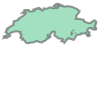

In [90]:
# gdf_onshore["DE0 0"]
# gdf_onshore.set_index("name")
gdf_onshore.iloc[5].geometry